# Classifying breast cancer molecular subtype using gene expression data


**In this exercise, we will using gene expression of 173 mutation driver genes associated with breast cancer to predict its molecular subtype.**

[more description of the exercises]

In this exercise we'll [learn how to / use]:

- lasso regression
- random forest
- xgboost

[see examples in 'exercise' folder as template]

## Part 1: Set up and exploratory data analysis

In [1]:
#Load the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#Load the data and perform exploratory data analysis
gene_exp = pd.read_csv("MTBC_Breast_Cancer.csv",sep='\t')

gene_exp.head(10)

,Sample Identifier,ER Status,HER2 Status,PR Status,Pam50 + Claudin-low subtype,ACVRL1,AFF2,AGMO,AGTR2,AHNAK,...,THADA,THSD7A,TP53,TTYH1,UBR5,USH2A,USP28,USP9X,UTRN,ZFP36L1
0,MB-0000,Positive,Negative,Negative,claudin-low,2.8018,0.9356,0.3067,-0.8504,1.8229,...,0.8474,4.0070,0.3481,2.0412,-1.5903,-1.0283,-0.0265,-0.0654,1.6603,0.3433
1,MB-0002,Positive,Negative,Positive,LumA,-1.8067,0.4817,-0.9456,-1.8446,1.6662,...,-0.5858,-0.6132,-0.0176,-0.7278,0.5215,-1.3180,0.1930,0.3214,0.1909,1.4831
2,MB-0005,Positive,Negative,Positive,LumB,-1.1869,0.0417,0.1168,0.9700,-0.0187,...,-1.4430,-1.3823,0.5126,-0.3872,0.5039,0.0779,2.3398,0.0411,-0.5709,2.7944
3,MB-0006,Positive,Negative,Positive,LumB,-1.7275,-0.2383,0.4058,1.4637,0.3075,...,-1.2363,0.2257,1.6748,-0.3071,1.6148,0.4038,1.5291,0.3613,-0.1076,2.0545
4,MB-0008,Positive,Negative,Positive,LumB,-0.8278,0.9725,0.9789,0.8657,-0.7646,...,-0.3349,-0.2765,0.3461,-0.1481,3.1054,-0.0013,-1.1404,0.6028,-0.7553,-0.0943
5,MB-0010,Positive,Negative,Positive,LumB,-0.2928,0.4498,-1.5594,-1.2046,0.3134,...,0.7349,-0.5363,-1.9502,-0.5007,0.3851,0.6921,-0.1630,-0.1507,0.0531,0.3152
6,MB-0014,Positive,Negative,Positive,LumB,-0.4881,0.8056,0.1276,0.3097,0.2816,...,-2.9184,0.4022,-0.5173,-0.3617,1.1951,0.3073,0.6322,-0.8498,-0.2708,2.0346
7,MB-0020,Negative,Negative,Negative,Normal,1.4061,0.7822,-0.0682,-0.2505,0.1113,...,-0.3789,1.0815,-0.4536,0.1065,-0.1990,-0.8381,-0.7641,0.2345,0.5474,0.2053
8,MB-0022,Positive,Negative,Negative,claudin-low,0.1605,0.3599,1.3598,0.8040,-0.4784,...,-1.9817,1.0986,-0.0853,-0.0966,2.4955,0.6978,0.9179,-0.8934,-1.1711,2.7166
9,MB-0028,Positive,Negative,Negative,LumB,-1.4534,1.5150,-0.4839,1.2135,-0.4467,...,-0.6995,0.7623,0.0521,-0.5370,2.8367,5.5288,0.1575,-0.8704,-1.3340,-0.8548


In [2]:
pd.pivot_table(gene_exp, values="Sample Identifier", index=["ER Status", "HER2 Status", "PR Status"], 
               columns=["Pam50 + Claudin-low subtype"], aggfunc='count', fill_value=0)

Pam50 + Claudin-low subtype      Basal  Her2  LumA  LumB  NC  Normal  \
ER Status HER2 Status PR Status                                        
Negative  Negative    Negative     157    30     3     0   0      11   
                      Positive       3     2     0     0   0       4   
          Positive    Negative      18    94     1     0   0       8   
                      Positive       2     3     0     0   0       0   
Positive  Negative    Negative      14    34   146   150   2      35   
                      Positive      13    30   530   280   4      84   
          Positive    Negative       2    16    11    26   0       4   
                      Positive       0    15     9    19   0       2   

Pam50 + Claudin-low subtype      claudin-low  
ER Status HER2 Status PR Status               
Negative  Negative    Negative           119  
                      Positive             6  
          Positive    Negative            13  
                      Positive             0  
Positive  Negative    Negative            44  
                      Positive            32  
          Positive    Negative             2  
                      Positive             2

In [3]:
#Check for any missing values 
gene_exp.isna().any().any()

False

In [4]:
#Plots
#gene_data = gene_exp.drop(columns = ["ER Status", "HER2 Status", "PR Status","Pam50 + Claudin-low subtype"])

#gene_data = gene_data.T


<AxesSubplot:title={'center':'Types of Breast Cancer'}, ylabel='Pam50 + Claudin-low subtype'>

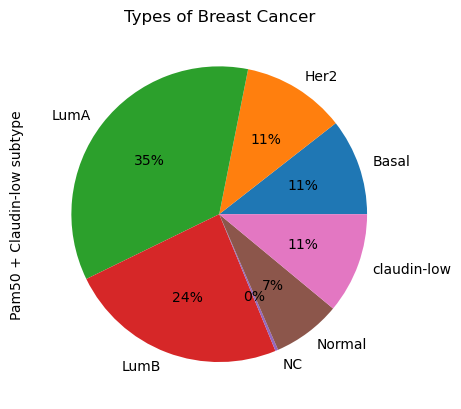

In [5]:
#Pie chart of cancer subtype cases
y_count = gene_exp.groupby(["Pam50 + Claudin-low subtype"])["Pam50 + Claudin-low subtype"].count()
y_count.plot(kind='pie', y="Pam50 + Claudin-low subtype", autopct='%1.0f%%', title='Types of Breast Cancer')

In [6]:
#Correlation between different genes 

## Part 2: Lasso regression

**Step 1. Prepare the data into x (predictors) and y (outcome) and training/test using 70/30 split**

In [7]:
#Split the data into y and x variables (outcome and predictors)

#Rename the y variable column
gene_exp.rename(columns = {'Pam50 + Claudin-low subtype':'Cancer_Subtype'}, inplace=True)

#Converting the cancer subtype variable to categorical
gene_exp['Cancer_Subtype'] = gene_exp['Cancer_Subtype'].astype('category')

#Replace the claudin-low subtype to compatible formatting
gene_exp['Cancer_Subtype'] = gene_exp['Cancer_Subtype'].cat.rename_categories({'claudin-low':'claudinlow'})

gene_exp['Cancer_Subtype'].unique()

['claudinlow', 'LumA', 'LumB', 'Normal', 'Her2', 'Basal', 'NC']
Categories (7, object): ['Basal', 'Her2', 'LumA', 'LumB', 'NC', 'Normal', 'claudinlow']

In [8]:
#Create a variable containing outcome only
y=gene_exp['Cancer_Subtype']

#Create dummy variables for y as it contains multiple categories (this is easier for the algorithm to handle)
y = pd.get_dummies(y)
y.head()

,Basal,Her2,LumA,LumB,NC,Normal,claudinlow
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [9]:
#Create dummy variables for categorical predictors
X_dummies = pd.get_dummies(gene_exp[['ER Status','HER2 Status','PR Status']])
X_dummies.head()

,ER Status_Negative,ER Status_Positive,HER2 Status_Negative,HER2 Status_Positive,PR Status_Negative,PR Status_Positive
0,0,1,1,0,1,0
1,0,1,1,0,0,1
2,0,1,1,0,0,1
3,0,1,1,0,0,1
4,0,1,1,0,0,1


In [10]:
#Drop the outcome, categorical predictors and sample identifier from the data
X_num = gene_exp.drop(['Cancer_Subtype','ER Status','HER2 Status','PR Status','Sample Identifier'], 
                      axis=1).astype('float64')

In [11]:
#Create a list of numerical features
list_num = X_num.columns
list_num   #We can see there are 173 genes in the predictors list

Index(['ACVRL1', 'AFF2', 'AGMO', 'AGTR2', 'AHNAK', 'AHNAK2', 'AKAP9', 'AKT1',
       'AKT2', 'ALK',
       ...
       'THADA', 'THSD7A', 'TP53', 'TTYH1', 'UBR5', 'USH2A', 'USP28', 'USP9X',
       'UTRN', 'ZFP36L1'],
      dtype='object', length=173)

In [12]:
#Bring all the predictors together, note only one dummy variable column for each predictor is included
X = pd.concat([X_num, X_dummies[['ER Status_Positive','HER2 Status_Positive','PR Status_Positive']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Columns: 176 entries, ACVRL1 to PR Status_Positive
dtypes: float64(173), uint8(3)
memory usage: 2.6 MB


In [13]:
#Split data into train and test using a 70:30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train.head() #The gene expression data has already been stardadised so this step will not be repeated here

,ACVRL1,AFF2,AGMO,AGTR2,AHNAK,AHNAK2,AKAP9,AKT1,AKT2,ALK,...,TTYH1,UBR5,USH2A,USP28,USP9X,UTRN,ZFP36L1,ER Status_Positive,HER2 Status_Positive,PR Status_Positive
39,1.1034,0.1656,1.4628,0.0661,-1.9062,-1.8053,0.7638,-1.9655,-1.2880,0.0201,...,-0.2860,0.3071,1.0995,1.3747,-0.8521,-0.9502,1.3671,1,0,0
1243,1.2069,-0.0494,0.5609,-0.6411,0.9271,0.8690,-0.2180,-0.4995,-0.4383,-0.3103,...,0.9661,-1.2599,-0.2068,-0.1707,0.0030,-0.1395,-1.4589,1,0,1
1649,-0.6813,-0.8010,1.5956,0.9321,1.3232,-0.0967,-1.5754,0.1109,-0.4659,0.0067,...,-0.5985,0.3358,-0.4211,-1.5854,-0.8578,-0.6875,0.2591,1,0,1
1894,1.2270,-0.4161,-0.2972,1.3631,-0.6971,-0.9343,1.5675,-2.1038,0.6482,-0.0971,...,-0.6015,-0.5705,0.1310,-1.4310,0.4742,0.4088,-2.4925,1,0,0
1540,-1.5055,0.2014,0.3537,0.1039,-0.5490,-0.3912,0.4890,1.3945,-0.4268,0.1248,...,-0.6453,-0.1281,-0.6180,-0.6081,-0.8487,-1.3041,1.6771,1,0,1


In [14]:
y_train.head()

,Basal,Her2,LumA,LumB,NC,Normal,claudinlow
39,0,0,0,0,0,0,1
1243,0,0,0,0,0,1,0
1649,0,0,0,1,0,0,0
1894,0,0,0,1,0,0,0
1540,0,0,0,1,0,0,0


<br />
  
**Step 2. Using cross validation to find the best alpha (the penalty term in Lasso regression)**

<br />

In [15]:
#Building the lasso model with cross validation to find optimal alpha
from sklearn.linear_model import MultiTaskLassoCV 

#Fitting Lasso with 10 fold cross validation using the best alpha
cv_lasso = MultiTaskLassoCV(cv=10, random_state=10, max_iter=10000).fit(X_train, y_train)

cv_lasso.alpha_  #This is the best alpha to use 

0.010749186140051133

In [16]:
#Creating the final lasso model incorporating best alpha from cv
from sklearn.linear_model import MultiTaskLasso

lasso_a = MultiTaskLasso(alpha = cv_lasso.alpha_)
lasso_a.fit(X_train, y_train)

MultiTaskLasso(alpha=0.010749186140051133)

In [17]:
#Identify the most important features used in the lasso model
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(lasso_a, prefit=True)
X_new = model.transform(X_train)

/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [18]:
#Outputting the most important features with nonzero coefficients
feature_idx = model.get_support()
selected_features = X_train.columns[feature_idx]
print(selected_features)

#145 variables were used in the final model

Index(['ACVRL1', 'AFF2', 'AGMO', 'AGTR2', 'AHNAK', 'AHNAK2', 'AKAP9', 'AKT1',
       'AKT2', 'ALK',
       ...
       'THADA', 'TP53', 'TTYH1', 'UBR5', 'USH2A', 'USP28', 'USP9X', 'ZFP36L1',
       'ER Status_Positive', 'PR Status_Positive'],
      dtype='object', length=145)


<br />

**Step 3. Evaluating model performance**

<br />

In [19]:
#Model evaluation 
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, lasso_a.predict(X_train))
print("R squared training data:", round(r2_train*100, 2))

r2_test = r2_score(y_test, lasso_a.predict(X_test))
print("R squared test data:", round(r2_test*100, 2))

R squared training data: 40.79
R squared test data: 35.04


In [20]:
#Mean squared error
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, lasso_a.predict(X_train))
mse_test = mean_squared_error(y_test, lasso_a.predict(X_test))

print('Mean Squared Error of the training data:', round(mse_train, 2))
print('Mean Squared Error of the test data:', round(mse_test, 2))

Mean Squared Error of the training data: 0.06
Mean Squared Error of the test data: 0.06


<br />

**Visualising cross validation of alpha**

<br />

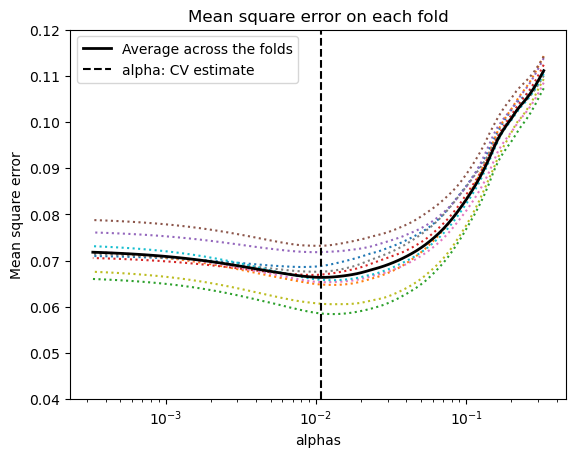

In [21]:
#Plotting the results of cross-validation with mean squared error

plt.semilogx(cv_lasso.alphas_, cv_lasso.mse_path_, ":")
plt.plot(
    cv_lasso.alphas_ ,
    cv_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    cv_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.04, 0.12
plt.ylim(ymin, ymax);

## Part 3: Random Forest

In [22]:
#Build the model using previously split data and import functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report

#Define the random forest model
rf = RandomForestClassifier(random_state=10)

In [23]:
#Define the hyperparameters to be used in the grid search
param_grid = {
    'n_estimators': [25, 50, 100],  #no. of trees to build
    'max_features': ['sqrt', 'log2'], #no. of features randomly selected at each split
    'min_samples_leaf': [4, 10, 25], #minimum no. of samples at terminal nodes (leaf) - allows asymmetric splits whilst balancing overfitting
}

#general rule for no. features at each split for RF is that 
#for classification: sqrt(total no. features)
#for regression: total no. features / 3 

In [24]:
#Define the cross-validation approach: repeated stratified k fold 
#stratified represents the class imbalance of the data in the k splits 
#repeats cv several times and averages result - better performance measure

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

In [25]:
#Bring together the model and cv method into the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')

#n_jobs = -1 allows all cores to be used during model building

In [26]:
#Convert multilabel y variable back to 1d array due to package requirement
y_train_rf = pd.from_dummies(y_train)

y_train_rf.head()

,
0,claudinlow
1,Normal
2,LumB
3,LumB
4,LumB


In [27]:
#Fit the grid search hyperparameter model to our data - using ravel.() to flattened the y variable 
grid_search.fit(X_train, y_train_rf.values.ravel())

/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=10),
             estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 10, 25],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

In [28]:
#Output the best hyperparameters and the mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}
Best score:  0.7236436937406595


In [29]:
#Update the model with the best parameters found and use it to predict on the test data 
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 4, n_estimators = 100)
rf.fit(X_train, y_train_rf.values.ravel())

y_pred_rf = rf.predict(X_test)
y_test_rf = pd.from_dummies(y_test)
print(classification_report(y_pred_rf, y_test_rf))

              precision    recall  f1-score   support

       Basal       0.87      0.76      0.81        63
        Her2       0.57      0.77      0.66        56
        LumA       0.88      0.71      0.79       275
        LumB       0.72      0.69      0.70       136
          NC       0.00      0.00      0.00         0
      Normal       0.19      0.73      0.30        11
  claudinlow       0.67      0.85      0.75        53

    accuracy                           0.73       594
   macro avg       0.56      0.64      0.57       594
weighted avg       0.78      0.73      0.75       594



/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilyjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#Confusion matrix of the predictions and observed data
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test_rf, y_pred_rf)
print(conf_mat)

[[ 48   4   1   0   0   0   2]
 [  2  43  11  19   0   0   0]
 [  0   2 195  21   0   2   1]
 [  0   1  34  94   0   0   2]
 [  0   0   2   0   0   0   0]
 [  0   5  27   0   0   8   3]
 [ 13   1   5   2   0   1  45]]


In [31]:
#Evaluate model performance - ROC curve


In [32]:
#Define colour gradient functions
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


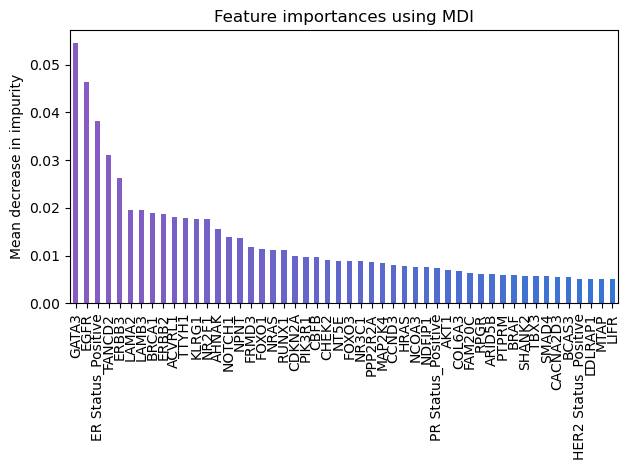

In [33]:
#Determine feature importance using mean decrease in gini impurity and plot the top 50 features
feature_names = X.columns.values.tolist()
rf_features = pd.Series(rf.feature_importances_, index=feature_names)
rf_features.sort_values(ascending = False , inplace = True)

color1 = "#8A5AC2"
color2 = "#3575D5"

fig, ax = plt.subplots()
rf_features[0:50].plot.bar(ax=ax, color= get_color_gradient(color1, color2, 50))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Part 4: XGBoost

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

array([0.57194245, 0.59927798, 0.55234657, 0.58844765, 0.6101083 ])

In [39]:
#Fit the xgboost model without tuning hyperparameters 
xgb = XGBClassifier(subsample=1,
colsample_bytree=1,
min_child_weight=1,
max_depth=6,
learning_rate=0.3,
n_estimators=100)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

accuracy_score(y_test, xgb_pred) #this is the base predictive performance

0.6060606060606061

In [ ]:
#Hyperparameters tuned here

#subsample 
#colsample_bytree
#max_depth
#min_child_weight
#Learning_rate
#N_estimators

In [48]:
#Tune hyperparameters using gridsearchcv

#Set the parameters to be tuned
xgb_params = {"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[2, 6, 12],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100]}

In [ ]:
#Fit a new model with parameters
#Define the model and use all cores, setting early stop params
xgb_tuned = XGBClassifier(n_estimators=100, n_jobs=-1,random_state=10)

#Initialise the gridsearch function
xgb_gs = GridSearchCV(xgb_tuned, param_grid = xgb_params, cv=5, 
                     scoring = "accuracy")

#Fit the gridsearch model to training data
xgb_gs.fit(X_train,y_train, verbose=0)
print(xgb_gs.best_params_)

In [ ]:
#Use the grid search model to predict on test data and output accuracy
xgb_gs_pred = xgb_gs.predict(X_test)
print('Accuracy:',accuracy_score(y_test, xgb_gs_pred))

## Part 5: Comparing different models

In [ ]:
#Using ROC curves to evaluate predictive performance of different models

## Next steps

[provide suggested next steps for people who've completed the exercise]

Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**